In [0]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import statistics
import matplotlib.pyplot as plt

# https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

walmart = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Final Capstone.csv')
walmart.head(2)

,Unique_ID,Store,Dept,Date,Weekly_Sales,IsHoliday,IsSummer,Type,Store_Size,Temperature,Fuel_Price,CPI,Unemployment
0,140214,1,1,2/5/10,24924.50,False,False,A,151315,42.31,2.572,211.096358,8.106
1,140221,1,1,2/12/10,46039.49,True,False,A,151315,38.51,2.548,211.242170,8.106


In [0]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
Unique_ID       421570 non-null int64
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
IsSummer        421570 non-null bool
Type            421570 non-null object
Store_Size      421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 36.2+ MB


In [0]:
print('There are {} stores in this dataset'.format(walmart['Store'].max()))
print('There are {} departments in this dataset'.format(walmart['Dept'].max()))
print('Each row shows the weekly sales of an individual department in a store.')
print('The timeframe of this dataset is 2010-02-05 to 2012-11-01.')

There are 45 stores in this dataset
There are 99 departments in this dataset
Each row shows the weekly sales of an individual department in a store.
The timeframe of this dataset is 2010-02-05 to 2012-11-01.


In [0]:
# The goal is to analyze the dataset for factors that drive sales to better understand when and where Walmart needs to increase their inventory
# Now lets see what factors drive sales

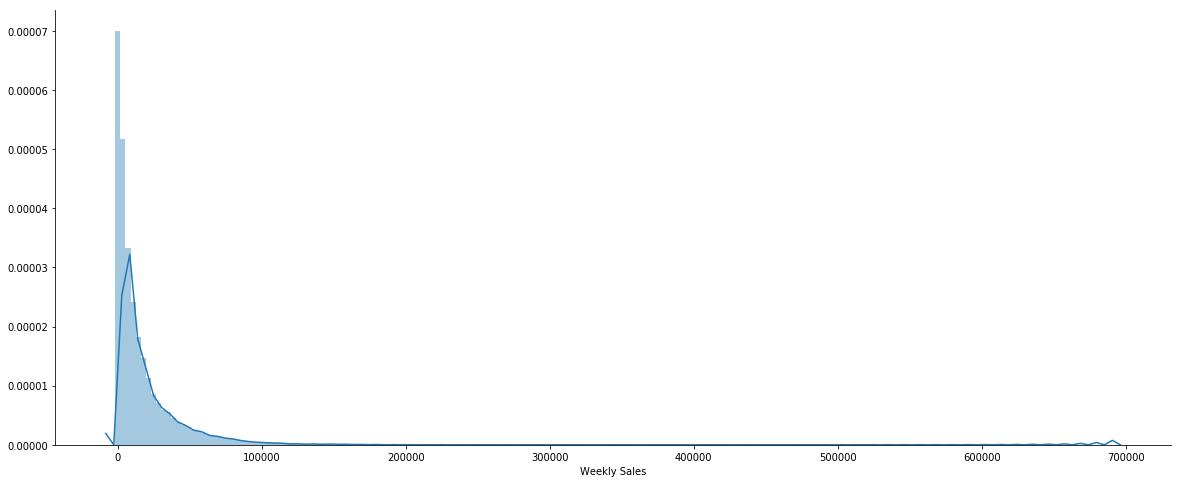

In [0]:
plt.figure(figsize = (20,8))
sns.distplot(walmart['Weekly_Sales'], bins=200)
plt.xlabel('Weekly Sales')
sns.despine()

In [0]:
# It seems that we have a couple of outliers in between $600,000 and $700,000
# Lets see if those outliers are because of specific store or department

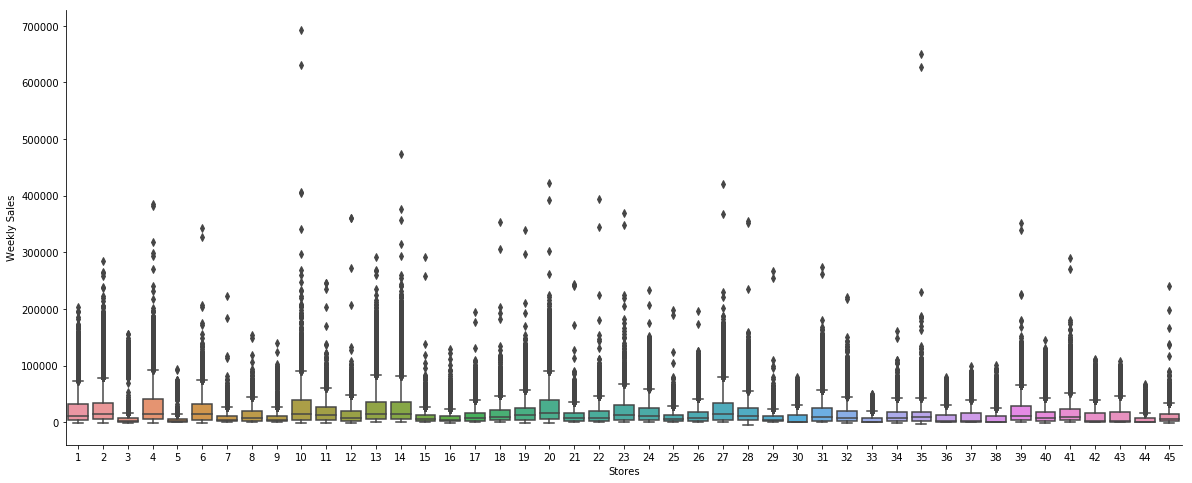

In [0]:
plt.figure(figsize = (20,8))
sns.boxplot(y='Weekly_Sales', x='Store', data=walmart)
sns.despine()
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.show()

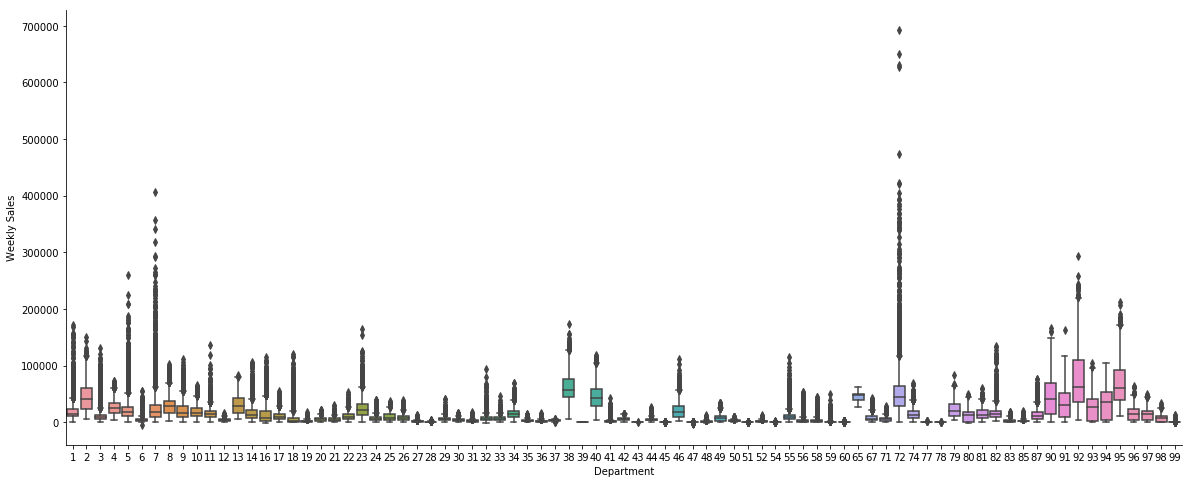

In [0]:
plt.figure(figsize = (20,8))
sns.boxplot(y='Weekly_Sales', x='Dept', data=walmart)
sns.despine()
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

In [0]:
walmart.corr()

,Unique_ID,Store,Dept,Weekly_Sales,IsHoliday,IsSummer,Store_Size,Temperature,Fuel_Price,CPI,Unemployment
Unique_ID,1.000000,1.000000,0.024005,-0.085195,-0.000551,0.002104,-0.182883,-0.050064,0.065465,-0.211070,0.208497
Store,1.000000,1.000000,0.024004,-0.085195,-0.000548,0.002085,-0.182881,-0.050097,0.065290,-0.211088,0.208552
Dept,0.024005,0.024004,1.000000,0.148032,0.000916,0.002668,-0.002966,0.004437,0.003572,-0.007477,0.007837
Weekly_Sales,-0.085195,-0.085195,0.148032,1.000000,0.012774,0.002644,0.243828,-0.002312,-0.000120,-0.020921,-0.025864
IsHoliday,-0.000551,-0.000548,0.000916,0.012774,1.000000,-0.170798,0.000593,-0.155949,-0.078281,-0.001944,0.010460
IsSummer,0.002104,0.002085,0.002668,0.002644,-0.170798,1.000000,-0.000070,0.591933,0.029730,0.003936,-0.019169
Store_Size,-0.182883,-0.182881,-0.002966,0.243828,0.000593,-0.000070,1.000000,-0.058313,0.003361,-0.003314,-0.068238
Temperature,-0.050064,-0.050097,0.004437,-0.002312,-0.155949,0.591933,-0.058313,1.000000,0.143859,0.182112,0.096730
Fuel_Price,0.065465,0.065290,0.003572,-0.000120,-0.078281,0.029730,0.003361,0.143859,1.000000,-0.164210,-0.033853
CPI,-0.211070,-0.211088,-0.007477,-0.020921,-0.001944,0.003936,-0.003314,0.182112,-0.164210,1.000000,-0.299953


In [0]:
stats.pearsonr(walmart['Weekly_Sales'], walmart['Store_Size'])

(0.2438279922630427, 0.0)

There seems to be a somewhat positive correlation between Store_size and Weekly_Sales and the p-value is < 0.05 so the correlation is significant here

My hypothesis is that the mean of bigger store is greater then the mean of smaller store 

My second hypothesis is that the mean of Weekly Sales is greater during the Summer than in other Season

My thrid hypothesis is that the mean of Weekly Sales is greater during Holidays 

Understanding these trends could help us understand at which stores we need to increase or decrease inventory and also when to increase or decrease inventory

(The second and third hypothesis are derived from my understanding of the market)

**Hypothesis 1**

Null Hypothesis: The mean of Weekly Sales in bigger store is equal to the mean of Weekly Sales in smaller stores

Alternative Hypothesis: The mean of Weekly Sales is greater in bigger stores than in smaller stores

~

To do this I will need to split the Store size by median then test the average of the upper half to the average of the lower half

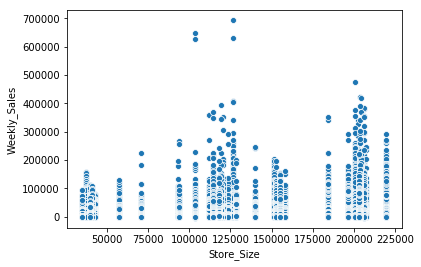

In [0]:
sns.scatterplot(x='Store_Size', y='Weekly_Sales', data=walmart)

In [0]:
walmart['Store_Size'].median()

140167.0

In [0]:
median = walmart['Store_Size'].median()
bigger_stores = walmart.iloc[(walmart['Store_Size'] >= median).values]
smaller_stores = walmart.iloc[(walmart['Store_Size'] < median).values]
bigger_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212351 entries, 0 to 391059
Data columns (total 13 columns):
Unique_ID       212351 non-null int64
Store           212351 non-null int64
Dept            212351 non-null int64
Date            212351 non-null object
Weekly_Sales    212351 non-null float64
IsHoliday       212351 non-null bool
IsSummer        212351 non-null bool
Type            212351 non-null object
Store_Size      212351 non-null int64
Temperature     212351 non-null float64
Fuel_Price      212351 non-null float64
CPI             212351 non-null float64
Unemployment    212351 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 19.8+ MB


In [0]:
smaller_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209219 entries, 20482 to 421569
Data columns (total 13 columns):
Unique_ID       209219 non-null int64
Store           209219 non-null int64
Dept            209219 non-null int64
Date            209219 non-null object
Weekly_Sales    209219 non-null float64
IsHoliday       209219 non-null bool
IsSummer        209219 non-null bool
Type            209219 non-null object
Store_Size      209219 non-null int64
Temperature     209219 non-null float64
Fuel_Price      209219 non-null float64
CPI             209219 non-null float64
Unemployment    209219 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 19.6+ MB


In [0]:
sum(bigger_stores['Weekly_Sales']) / len(bigger_stores['Weekly_Sales'])

20478.17135186557

In [0]:
# Now that I have my data and there is also no null values, I can start the independent sample test

In [0]:
stats.ttest_ind(bigger_stores['Weekly_Sales'], smaller_stores['Weekly_Sales'])

Ttest_indResult(statistic=132.1761730405638, pvalue=0.0)

There is a difference of 132 standard deviation between the means of these two datasets. Now lets calculate a confidence interval to get an understanding of effect size

In [0]:
 # Function for the Confidence Interval
 def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")




In [0]:
get_95_ci(smaller_stores['Weekly_Sales'], bigger_stores['Weekly_Sales'])

'The difference in means at the 95% confidence interval (two-tail) is between 8927.20036670907 and 9195.089766556286.'

Now lets calculate the effect size using Cohen's D

In [0]:
def cohens_d(x ,y):
  x_variance = x.var()
  y_variance = y.var()
  x_mean = x.mean()
  y_mean = y.mean()
  s_pooled = math.sqrt((x_variance + y_variance)/2)
  cohen = (y_mean - x_mean) / s_pooled
  return cohen

In [0]:
cohens_d(smaller_stores['Weekly_Sales'], bigger_stores['Weekly_Sales'])

0.40779271785921944

**Hypothesis 1 Conclusion** 

Reject the null hypothesis that mean of Weekly Sales is equal during Holidays and Non-Holidays

The sample means are significantly different from each other at p < 0.005

The difference in means at the 95% confidence interval (two-tail) is between 8927 and 9195 dollars

Cohen's D is .4 indicating a medium effect size


**Hypothesis 2** 

Null Hypothesis: The mean of Weekly Sales during Summer is equal to the mean of Weekly Sales during other seasons

Alternative Hypothesis: The mean of Weekly Sales is greater during the Summer than in other seasons

~

The process shall be the same as before. This time we are sectioning our data by dates. 

We will be analyzing the means of Weekly Sales during the months of June, July, and August (Summer) 

against the means of Weekly Sales during the rest of the year

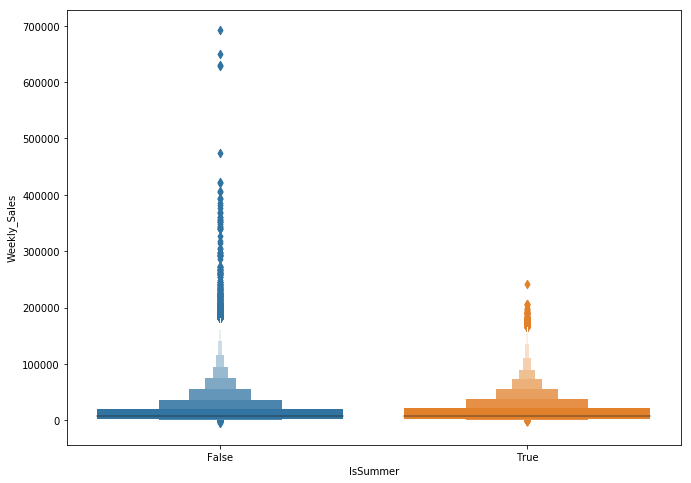

In [0]:
plt.figure(figsize = (11,8))
sns.boxenplot( y='Weekly_Sales', x='IsSummer', data=walmart)

In [0]:
summer = walmart.iloc[(walmart['IsSummer'] == True).values]
not_summer = walmart.iloc[(walmart['IsSummer'] == False).values]
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117286 entries, 17 to 421561
Data columns (total 13 columns):
Unique_ID       117286 non-null int64
Store           117286 non-null int64
Dept            117286 non-null int64
Date            117286 non-null object
Weekly_Sales    117286 non-null float64
IsHoliday       117286 non-null bool
IsSummer        117286 non-null bool
Type            117286 non-null object
Store_Size      117286 non-null int64
Temperature     117286 non-null float64
Fuel_Price      117286 non-null float64
CPI             117286 non-null float64
Unemployment    117286 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 11.0+ MB


In [0]:
not_summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304284 entries, 0 to 421569
Data columns (total 13 columns):
Unique_ID       304284 non-null int64
Store           304284 non-null int64
Dept            304284 non-null int64
Date            304284 non-null object
Weekly_Sales    304284 non-null float64
IsHoliday       304284 non-null bool
IsSummer        304284 non-null bool
Type            304284 non-null object
Store_Size      304284 non-null int64
Temperature     304284 non-null float64
Fuel_Price      304284 non-null float64
CPI             304284 non-null float64
Unemployment    304284 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 28.4+ MB


In [0]:
stats.ttest_ind(summer['Weekly_Sales'], not_summer['Weekly_Sales'])

Ttest_indResult(statistic=1.7166046251644225, pvalue=0.08605217142970695)

In [0]:
get_95_ci(summer['Weekly_Sales'], not_summer['Weekly_Sales'])

'The difference in means at the 95% confidence interval (two-tail) is between -283.9585747365529 and 15.973108791750064.'

In [0]:
cohens_d(summer['Weekly_Sales'], not_summer['Weekly_Sales'])

-0.005958494205933743

**Hypothesis 2 Conclusion**

Failed to reject the null hypothesis that mean of Weekly Sales is equal during the Summer and other seasons

The sample means are not significantly different from each other at p > 0.05

The difference in means at the 95% confidence interval (two-tail) is between -283 and 15 dollars

Cohen's D is -0.005 indicating that the effect size extremely small or neglible


**Hypothesis 3**

Null Hypothesis: The mean of Weekly Sales is equal during the Holidays and Non-Holidays

Alternative Hypothesis: The mean of Weekly Sales is greater during Holidays in comparison to other days during the year.

The Holidays that were notated in the dataset are: 

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


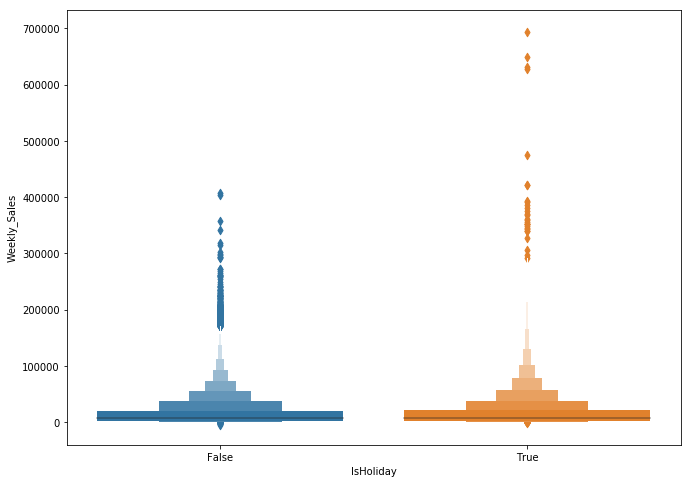

In [0]:
plt.figure(figsize = (11,8))
sns.boxenplot( y='Weekly_Sales', x='IsHoliday', data=walmart)

In [0]:
holidays = walmart.iloc[(walmart['IsHoliday'] == True).values]
non_holidays = walmart.iloc[(walmart['IsHoliday'] == False).values]
holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29661 entries, 1 to 421562
Data columns (total 13 columns):
Unique_ID       29661 non-null int64
Store           29661 non-null int64
Dept            29661 non-null int64
Date            29661 non-null object
Weekly_Sales    29661 non-null float64
IsHoliday       29661 non-null bool
IsSummer        29661 non-null bool
Type            29661 non-null object
Store_Size      29661 non-null int64
Temperature     29661 non-null float64
Fuel_Price      29661 non-null float64
CPI             29661 non-null float64
Unemployment    29661 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 2.8+ MB


In [0]:
non_holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391909 entries, 0 to 421569
Data columns (total 13 columns):
Unique_ID       391909 non-null int64
Store           391909 non-null int64
Dept            391909 non-null int64
Date            391909 non-null object
Weekly_Sales    391909 non-null float64
IsHoliday       391909 non-null bool
IsSummer        391909 non-null bool
Type            391909 non-null object
Store_Size      391909 non-null int64
Temperature     391909 non-null float64
Fuel_Price      391909 non-null float64
CPI             391909 non-null float64
Unemployment    391909 non-null float64
dtypes: bool(2), float64(5), int64(4), object(2)
memory usage: 36.6+ MB


In [0]:
stats.ttest_ind(non_holidays['Weekly_Sales'] ,holidays['Weekly_Sales'])

Ttest_indResult(statistic=-8.294756853931894, pvalue=1.0912222677432844e-16)

In [0]:
get_95_ci(non_holidays['Weekly_Sales'] ,holidays['Weekly_Sales'])

'The difference in means at the 95% confidence interval (two-tail) is between 816.7858317348644 and 1451.9704049490658.'

In [0]:
cohens_d(non_holidays['Weekly_Sales'] ,holidays['Weekly_Sales'])

0.04556324113440427

**Hypothesis 3 Conclusion**

We reject the null hypothesis that mean of Weekly Sales is equal during Holidays and Non-Holidays

The sample means are not significantly different from each other at p = 1

The difference in means at the 95% confidence interval (two-tail) is between  816 and 1451 dollars


**The Big Conclusion**

I know I just threw a lot of numbers out there. it was all in an effort to answer my intial question. What factors drive sales in Walmart? We need to know the answer to that question so we can understand when and where to increase our inventory in reponse to demand.

What we found out was that stores that are > ~11,000 sqft. generate between 8927 and 9195 dollars (at a 95% confidence interval) more than stores < ~11,000 sqft. This indicates stores of greater size will need more inventory than does of smaller sizes

We also found out that during Holidays stores generate  between 816 and 1451 dollars (at a 95% confidence interval) more than days that are non-holidays. This indicates that we will need more inventory during Holiday 

Finally, Seasons have little to no effect on Weekly Sales. This indicates stores should keep their inventory steady during these periods of time (unless they are an outlier and their data tells them otherwise)

In [0]:
def avg(lst):
  return sum(lst)/len(lst)

print(avg(bigger_stores['Weekly_Sales']))
print(avg(smaller_stores['Weekly_Sales']))

print(avg(holidays['Weekly_Sales']))
print(avg(non_holidays['Weekly_Sales']))

print(avg(summer['Weekly_Sales']))
print(avg(not_summer['Weekly_Sales']))

20478.17135186557
11417.026285232892
17035.82318735048
15901.445069008516
16077.972417083645
15943.979684111244


In [0]:
def error(lst):
  er = math.sqrt(statistics.variance(lst) / len(lst))
  return er



In [0]:
print(error(bigger_stores['Weekly_Sales']))
print(error(smaller_stores['Weekly_Sales']))

print(error(holidays['Weekly_Sales']))
print(error(non_holidays['Weekly_Sales']))

print(error(summer['Weekly_Sales']))
print(error(not_summer['Weekly_Sales']))

57.49253582017549
36.94381370962304
158.06187947982164
35.67061864102704
64.16790746772793
41.67429741217872
